In [2]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mshr
import numpy as np
import scipy.integrate as integrate
from fenics import *

In [55]:
L_mot = .007
l_mot = .007
n_trou = 1
L_1 = .003
l_1 = .005
L_2 = .005
l_2 = .015
L_3 = .000001
l_3 = .000001
Delta_vert_12 = .005
Delta_vert_23 = .000001
L_vide = .014
l_vide = .01
Delta_horiz_1 = L_mot/n_trou - L_1
Delta_horiz_2 = L_mot/n_trou - L_2
Delta_horiz_3 = L_mot/n_trou - L_3
h_grille = l_1 + l_2 + l_3 + Delta_vert_12 + Delta_vert_23

In [56]:
def segment(Point1,Point2):
    """
    Renvoie une liste des 4 coordonnées des extrémités à partir des deux points donnés
    [x1,y1,x2,y2]
    """
    return [Point1[0],Point1[1],Point2[0],Point2[1]]

def rect(Point1,Point2):
    """
    Renvoie les 4 listes des coordonnées des segments construisant le rectangle issu des 2 points d'entrée
    ([x1,y1,x2,y2], [x1,y1,x2,y2], [x1,y1,x2,y2], [x1,y1,x2,y2])
    """
    s1=segment(Point1, Point(Point1[0],Point2[1]))
    s2=segment(Point(Point1[0],Point2[1]), Point2)
    s3=segment(Point2, Point(Point2[0],Point1[1]))
    s4=segment(Point(Point2[0],Point1[1]), Point1)
    return (s1,s2,s3,s4)

In [57]:
P1 = Point(-L_mot/2, -l_mot/2)
P2 = Point(L_mot/2, l_mot/2)
P3 = P1 + Point(L_mot, -h_grille)
P4 = P1 + Point(-(L_vide-L_mot)/2, -(h_grille+l_vide))
P5 = P3 + Point((L_vide-L_mot)/2, 0)

moteur = mshr.Rectangle(P1, P2)
grille = mshr.Rectangle(P1, P3)
vide = mshr.Rectangle(P4, P5)

zone = moteur + grille + vide

P6 = P1 + Point(L_1/2, -l_1)
P7 = P6 + Point(-L_1/2 , -Delta_vert_12)
P8 = P7 + Point(L_2/2, -l_2)
P9 = P8 + Point(-L_2/2, -Delta_vert_23)
P10 = P9 + Point(L_3/2, -l_3)
P11 = P3 + Point(-L_3/2, l_3)
P12 = P11 + Point(L_3/2, Delta_vert_23)
P13 = P12 + Point(-L_2/2, l_2)
P14 = P13 + Point(L_2/2, Delta_vert_12)
P15 = P14 + Point(-L_1/2, l_1)

rect_1 = mshr.Rectangle(P1, P6)
rect_2 = mshr.Rectangle(P7, P8)
rect_3 = mshr.Rectangle(P9, P10)
rect_4 = mshr.Rectangle(P3, P11)
rect_5 = mshr.Rectangle(P12, P13)
rect_6 = mshr.Rectangle(P14, P15)

zone -= (rect_1 + rect_2 + rect_3 + rect_4 + rect_5 + rect_6)

liste_segment=[
    segment(P1,P2+Point(-L_mot,l_mot)),
    segment(P2+Point(-L_mot,l_mot),P2), 
    segment(P2, P15+Point(L_1/2,0)),
    segment(P15+Point(L_1/2,0), P15),
    segment(P15, P15+Point(0,-l_1)),
    segment(P15+Point(0,-l_1), P14),
    segment(P14, P14+Point(0,-Delta_vert_12)),
    segment(P14+Point(0,-Delta_vert_12), P13),
    segment(P13, P13+Point(0, -l_2)),
    segment(P13+Point(0, -l_2), P12),
    segment(P12, P12+Point(0,-Delta_vert_23)),
    segment(P12+Point(0,-Delta_vert_23), P11),
    segment(P11, P11+Point(0, -l_3)),
    segment(P11+Point(0, -l_3), P5),
    segment(P5, P5+Point(0,-l_vide)),
    segment(P5+Point(0,-l_vide), P4),
    segment(P4, P4+Point(0,l_vide)),
    segment(P4+Point(0,l_vide), P10),
    segment(P10, P10+Point(0,l_3)),
    segment(P10+Point(0,l_3),P9),
    segment(P9,P9+Point(0,Delta_vert_23)),
    segment(P9+Point(0,Delta_vert_23),P8),
    segment(P8, P8+Point(0, l_2)),
    segment(P8+Point(0, l_2), P7),
    segment(P7, P7+Point(0,Delta_vert_12)),
    segment(P7+Point(0,Delta_vert_12), P6),
    segment(P6, P6+Point(0,l_1)),
    segment(P6+Point(0,l_1),P1)
    ]

In [58]:
for i in range (n_trou-1):
    PN1 = P6 + Point((i+1)*Delta_horiz_1 + i*L_1, 0)
    PN2 = PN1 + Point(L_1, l_1)
    PN3 = P8 + Point((i+1)*Delta_horiz_2 + i*L_2, 0)
    PN4 = PN3 + Point(L_2, l_2)
    PN5 = P10 + Point((i+1)*Delta_horiz_3 + i*L_3, 0)
    PN6 = PN5 + Point(L_3, l_3)
    
    rectN_1 = mshr.Rectangle(PN1, PN2)
    rectN_2 = mshr.Rectangle(PN3, PN4)
    rectN_3 = mshr.Rectangle(PN5, PN6)
    
    zone -= (rectN_1 + rectN_2 + rectN_3)
    
    s1,s2,s3,s4=rect(PN1,PN2)
    liste_segment.append(s1)
    liste_segment.append(s2)
    liste_segment.append(s3)
    liste_segment.append(s4)
    
    s1,s2,s3,s4=rect(PN3,PN4)
    liste_segment.append(s1)
    liste_segment.append(s2)
    liste_segment.append(s3)
    liste_segment.append(s4)
    
    s1,s2,s3,s4=rect(PN5,PN6)
    liste_segment.append(s1)
    liste_segment.append(s2)
    liste_segment.append(s3)
    liste_segment.append(s4)

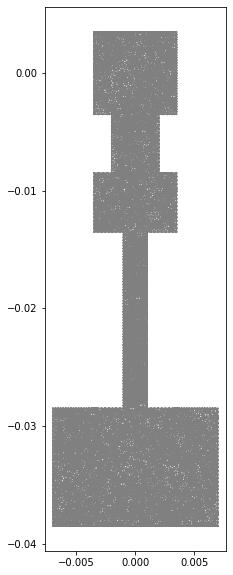

In [60]:
mesh=mshr.generate_mesh(zone, 100)

plt.figure(figsize=(10,10))
plot(mesh)
plt.show()